# COVID-19 Status (Colombia)

##### Limpieza y ajuste de datos (Desarrollador)*

In [1]:
# Libraries import
from datetime import datetime
from plotly.offline import init_notebook_mode, iplot
import requests
import pandas as pd
import numpy as np
import plotly.graph_objs as go
from googletrans import Translator
import matplotlib.pyplot as plt
import statsmodels.api as sn

In [2]:
# Dataset import - 'Datos abiertos COVID-19 (Colombia)'
data = pd.DataFrame.from_dict(requests.get('https://www.datos.gov.co/resource/gt2j-8ykr.json?$limit=999999999').json())
#data

In [3]:
# Data cleaning and adjusting

# FE DE ERRATAS (2020-05-03): --------------------------------------------------------------------------------------------------------------------------------------------------
#data.loc[(data['Edad'].str.contains('-   -'))] = None
    
data = data[~data['edad'].str.contains('-   -')]
#---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

#translator = Translator()

data.columns = ['Id de caso', 'Fecha de notificación', 'Código DIVIPOLA', 'Ciudad de ubicación', 'Departamento', 'Estado', 'Edad', 'Sexo', 'Tipo', 'Severidad','País de procedencia', 'Fecha de inicio de síntomas', 'Fecha de diagnóstico', 'Fecha de recuperación', 'Fecha de reporte web', 'Tipo de recuperación', 'Código departamento', 'Código país', 'Pertenecia Étnica', 'Fecha de defunción', 'Nombre Grupo Étnico']

for column in ['Ciudad de ubicación', 'Estado', 'Sexo', 'Tipo', 'Severidad', 'País de procedencia']:
    data[column] = data[column].str.capitalize()
    
for column in ['Fecha de notificación', 'Fecha de inicio de síntomas', 'Fecha de defunción', 'Fecha de diagnóstico', 'Fecha de recuperación', 'Fecha de reporte web']:
       data[column] = data[column].str.slice(0,10).replace(r'(\d+)-(\d+)-(\d+)', r'\1-\2-\3', regex=True).apply(lambda x: pd.to_datetime(x, dayfirst=True, errors='ignore'))

data.loc[(data['Edad'].str.contains('[a-zA-Z]+', regex=True)), 'Edad'] = 0
data['Clasificación de edad'] = pd.cut(x=data['Edad'].apply(lambda x: float(x)), bins=[-np.inf,10,20,30,40,50,60,70,80,90,np.inf], include_lowest=True, labels=['0 - 10', '10 - 20', '20 - 30', '30 - 40', '40 - 50', '50 - 60', '60 - 70', '70 - 80', '80 - 90', '90 - 100+'])

#data['País de procedencia'] = data['País de procedencia'].apply(Translator().translate, src='es', dest='en').apply(getattr, args=('text',))

data = data[['Id de caso', 'Fecha de reporte web', 'Fecha de diagnóstico', 'Fecha de notificación', 'Fecha de inicio de síntomas', 'Fecha de recuperación', 'Fecha de defunción', 'Ciudad de ubicación', 'Departamento', 'Severidad', 'Estado', 'Edad', 'Clasificación de edad', 'Sexo', 'Pertenecia Étnica', 'Nombre Grupo Étnico', 'Tipo', 'Tipo de recuperación', 'País de procedencia', 'Código departamento', 'Código país', 'Código DIVIPOLA']]
data = data.set_index('Id de caso')

date = datetime.today().strftime('%Y-%m-%d')
data.to_csv(f'./Datasets/COVID-19 Status (Colombia) [{date}].csv', index = True)

def numbers(div):
    for i in range(0, len(ax.patches)//div, 1):
        height = 0
        for j in range(0, div, 1):
            height += ax.patches[j*(len(ax.patches)//div)+i].get_height()
        ax.text(ax.patches[i].get_x()+(ax.patches[i].get_width()/10),height+(height/100)+10, int(height), fontsize=7, color='dimgrey', rotation=90)

def numbers_H(div):
    for i in range(0, len(ax.patches)//div, 1):
        width = 0
        for j in range(0, div, 1):
            width += ax.patches[j*(len(ax.patches)//div)+i].get_width()
        ax.text(width+(width/100)+10,ax.patches[i].get_y()+(ax.patches[i].get_height()/10), int(width), fontsize=7, color='dimgrey', rotation=0)

In [4]:
# Test

#data['País de procedencia'].unique().apply(lambda x: Translator().translate(x, src='es', dest='en').text)
#Translator().translate('España', src='es', dest='en').text

In [5]:
# In-line plots libraries import

%matplotlib inline
init_notebook_mode(connected = True)

## Análisis Dataset - COVID-19 (Colombia)

### - Datos Abiertos COVID-19 (Colombia)

In [6]:
data

Fecha de reporte web Fecha de diagnóstico Fecha de notificación  \
Id de caso                                                                   
1                    2020-03-06           2020-03-06            2020-03-02   
2                    2020-03-09           2020-03-09            2020-03-06   
3                    2020-03-09           2020-03-09            2020-03-07   
4                    2020-03-11           2020-03-11            2020-03-09   
5                    2020-03-11           2020-03-11            2020-03-09   
...                         ...                  ...                   ...   
267421               2020-07-28           2020-07-28            2020-07-20   
267422               2020-07-28           2020-07-28            2020-07-04   
267423               2020-07-28           2020-07-28            2020-07-19   
267424               2020-07-28           2020-07-28            2020-07-22   
267425               2020-07-28           2020-07-28            2020-07-23   

           Fecha de inicio de síntomas Fecha de recuperación  \
Id de caso                                                     
1                  2020-02-27 00:00:00            2020-03-13   
2                  2020-03-04 00:00:00            2020-03-19   
3                  2020-02-29 00:00:00            2020-03-15   
4                  2020-03-06 00:00:00            2020-03-26   
5                  2020-03-08 00:00:00            2020-03-23   
...                                ...                   ...   
267421             2020-07-20 00:00:00                   NaT   
267422             2020-06-07 00:00:00                   NaT   
267423             2020-07-19 00:00:00                   NaT   
267424             2020-07-22 00:00:00                   NaT   
267425             2020-07-23 00:00:00                   NaT   

           Fecha de defunción  Ciudad de ubicación     Departamento Severidad  \
Id de caso                                                                      
1                         NaT          Bogotá d.c.      Bogotá D.C.      Leve   
2                         NaT  Guadalajara de buga  Valle del Cauca      Leve   
3                         NaT             Medellín        Antioquia      Leve   
4                         NaT             Medellín        Antioquia      Leve   
5                         NaT             Medellín        Antioquia      Leve   
...                       ...                  ...              ...       ...   
267421                    NaT          Bogotá d.c.      Bogotá D.C.      Leve   
267422                    NaT          Bogotá d.c.      Bogotá D.C.      Leve   
267423                    NaT          Bogotá d.c.      Bogotá D.C.      Leve   
267424                    NaT          Bogotá d.c.      Bogotá D.C.      Leve   
267425                    NaT          Bogotá d.c.      Bogotá D.C.      Leve   

                Estado  ... Clasificación de edad Sexo Pertenecia Étnica  \
Id de caso              ...                                                
1           Recuperado  ...               10 - 20    F              Otro   
2           Recuperado  ...               30 - 40    M              Otro   
3           Recuperado  ...               40 - 50    F              Otro   
4           Recuperado  ...               50 - 60    M              Otro   
5           Recuperado  ...               20 - 30    M              Otro   
...                ...  ...                   ...  ...               ...   
267421            Casa  ...               40 - 50    F               NaN   
267422            Casa  ...               30 - 40    M               NaN   
267423            Casa  ...               30 - 40    M               NaN   
267424            Casa  ...                0 - 10    M               NaN   
267425            Casa  ...               40 - 50    M               NaN   

           Nombre Grupo Étnico         Tipo Tipo de recuperación  \
Id de caso                                          

### - Mapa de influencia - COVID-19 (Colombia) [Beta]

In [7]:
map_data = dict(
    type = 'choropleth',
    locations = data['País de procedencia'],
    locationmode = 'country names',
    colorscale = 'viridis',
    z = data['País de procedencia'].value_counts().tolist())

geo_map = go.Figure(data=[map_data])
iplot(geo_map)

### - Casos confirmados VS Departamento (Sexo)

In [8]:
data.groupby(['Departamento', 'Sexo']).size().unstack().fillna(0)

Sexo                                                    F      M
Departamento                                                    
Amazonas                                             1056   1451
Antioquia                                           12032  15194
Arauca                                                 39    144
Archipiélago de San Andrés Providencia y Santa ...     10     26
Atlántico                                           10118  11441
Barranquilla D.E.                                   13223  15430
Bogotá D.C.                                         44777  46631
Bolívar                                              1064   1272
Boyacá                                                421    423
Buenaventura D.E.                                     762   1307
Caldas                                                368    366
Caquetá                                               373    369
Cartagena D.T. y C.                                  6758   8269
Casanare                                              113    155
Cauca                                                 738    958
Cesar                                                1204   1594
Chocó                                                1329   1587
Cundinamarca                                         3676   3782
Córdoba                                              2374   2467
Guainía                                                 7      8
Guaviare                                               10     75
Huila                                                 367    379
La Guajira                                            948   1019
Magdalena                                             985   1060
Meta                                                  603   1777
Nariño                                               3306   3950
Norte de Santander                                    759   1087
Putumayo                                              340    422
Quindío                                               139    127
Risaralda                                             765    672
Santa Marta D.T. y C.                                1757   1843
Santander                                            1219   1831
Sucre                                                2595   3068
Tolima                                                769   1472
Valle del Cauca                                      9589  11073
Vaupés                                                 27     34
Vichada                                                 1      1

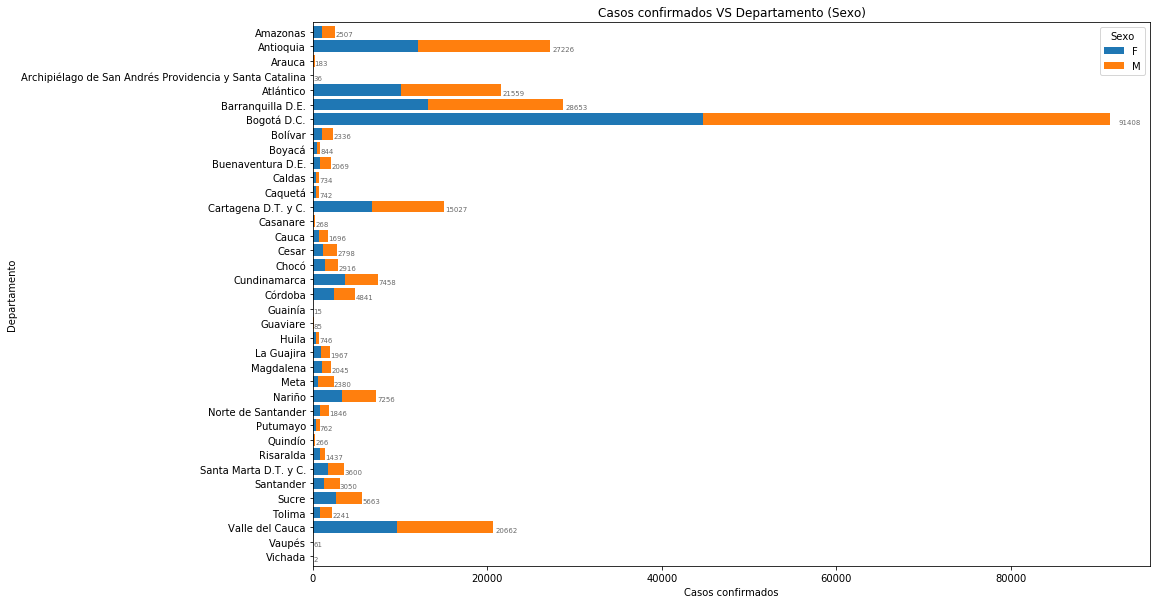

In [9]:
ax = data.groupby(['Departamento', 'Sexo']).size().unstack().fillna(0).sort_index(ascending=False).plot(kind='barh', width=0.8, stacked=True, figsize=(15,10), title=('Casos confirmados VS Departamento (Sexo)'))
ax.set_xlabel('Casos confirmados')
div = len(data['Sexo'].unique())
numbers_H(div)

### - Casos confirmados VS Departamento (Clasificación de edad)

In [10]:
data.groupby(['Departamento', 'Clasificación de edad']).size().unstack().fillna(0)

Clasificación de edad                               0 - 10  10 - 20  20 - 30  \
Departamento                                                                   
Amazonas                                               133      452      510   
Antioquia                                              892     1920     7227   
Arauca                                                   7       38       71   
Archipiélago de San Andrés Providencia y Santa ...       0        1        9   
Atlántico                                              945     1621     4687   
Barranquilla D.E.                                     1090     1819     6258   
Bogotá D.C.                                           3994     6979    20910   
Bolívar                                                109      217      508   
Boyacá                                                  51       71      178   
Buenaventura D.E.                                       45      279      468   
Caldas                                                  28       45      167   
Caquetá                                                 24       47      219   
Cartagena D.T. y C.                                    657     1102     3433   
Casanare                                                12       15       83   
Cauca                                                   83      151      411   
Cesar                                                  183      253      677   
Chocó                                                  123      254      678   
Cundinamarca                                           366      543     1718   
Córdoba                                                159      244      970   
Guainía                                                  0        2        4   
Guaviare                                                 1       31       19   
Huila                                                   43       72      150   
La Guajira                                             108      199      431   
Magdalena                                              108      146      379   
Meta                                                    42      195      740   
Nariño                                                 340      639     1690   
Norte de Santander                                      61       71      434   
Putumayo                                                20       56      223   
Quindío                                                  9       14       47   
Risaralda                                               89      133      320   
Santa Marta D.T. y C.                                  139      250      795   
Santander                                              114      223      738   
Sucre                                                  229      450     1181   
Tolima                                                 100      134      707   
Valle del Cauca                                        703     1418     4728   
Vaupés                                                   4        5       19   
Vichada                                                  0        1        0   

Clasificación de edad                               30 - 40  40 - 50  50 - 60  \
Departamento                                                                    
Amazonas                                                481      341      273   
Antioquia                                              6880     4261     3190   
Arauca                                                   43       13        6   
Archipiélago de San Andrés Providencia y Santa ...       11        9        3   
Atlántico                                              5022     3426     2800   
Barranquilla D.E.                                      6806     4479     3863   
Bogotá D.C.                                           20056    14773    12419   
Bolívar                                                 543      346      211   
Boyacá                                                  163      131 

In [11]:
ax = data.groupby(['Departamento', 'Clasificación de edad']).size().unstack().fillna(0).sort_index(ascending=False).plot(kind='barh', width=0.8, stacked=True, figsize=(15,10), title=('Casos confirmados VS Departamento (Clasificación de edad)'))
ax.set_xlabel('Casos confirmados')
div = len(data['Clasificación de edad'].unique())
numbers_H(div)

### - Casos confirmados VS Departamento (Estado)

In [12]:
data.groupby(['Departamento', 'Estado']).size().unstack().fillna(0)

Estado                                                 Casa  Fallecido  \
Departamento                                                             
Amazonas                                               73.0      102.0   
Antioquia                                           17547.0      394.0   
Arauca                                                 40.0        1.0   
Archipiélago de San Andrés Providencia y Santa ...      5.0        0.0   
Atlántico                                            5186.0      996.0   
Barranquilla D.E.                                    6066.0     1440.0   
Bogotá D.C.                                         43261.0     2392.0   
Bolívar                                               828.0      106.0   
Boyacá                                                314.0       26.0   
Buenaventura D.E.                                     288.0      133.0   
Caldas                                                410.0        9.0   
Caquetá                                               542.0       15.0   
Cartagena D.T. y C.                                  3173.0      449.0   
Casanare                                              126.0        4.0   
Cauca                                                 768.0       54.0   
Cesar                                                1095.0       53.0   
Chocó                                                 643.0       95.0   
Cundinamarca                                         2854.0      195.0   
Córdoba                                              2217.0      548.0   
Guainía                                                 1.0        1.0   
Guaviare                                               35.0        0.0   
Huila                                                 298.0       18.0   
La Guajira                                            799.0      106.0   
Magdalena                                             559.0      189.0   
Meta                                                  674.0       30.0   
Nariño                                               2569.0      220.0   
Norte de Santander                                   1139.0       80.0   
Putumayo                                              581.0       27.0   
Quindío                                                53.0        7.0   
Risaralda                                             675.0       26.0   
Santa Marta D.T. y C.                                1368.0      138.0   
Santander                                            1524.0       69.0   
Sucre                                                2259.0      351.0   
Tolima                                                813.0       44.0   
Valle del Cauca                                      7084.0      755.0   
Vaupés                                                 11.0        1.0   
Vichada                                                 0.0        0.0   

Estado                                              Hospital  Hospital uci  \
Departamento                                                                 
Amazonas                                                11.0           6.0   
Antioquia                                             1123.0         161.0   
Arauca                                                   7.0           2.0   
Archipiélago de San Andrés Providencia y Santa ...       1.0           1.0   
Atlántico                                              725.0         106.0   
Barranquilla D.E.                                      866.0         101.0   
Bogotá D.C.                                           5203.0         324.0   
Bolívar                                                124.0           9.0   
Boyacá                                                  56.0           6.0   
Buenaventura D.E.                                      118.0          27.0   
Caldas                                                  27.0           8.0   
Caquetá                                                 64.0           4.0   
Cartagena D.T. y C.  

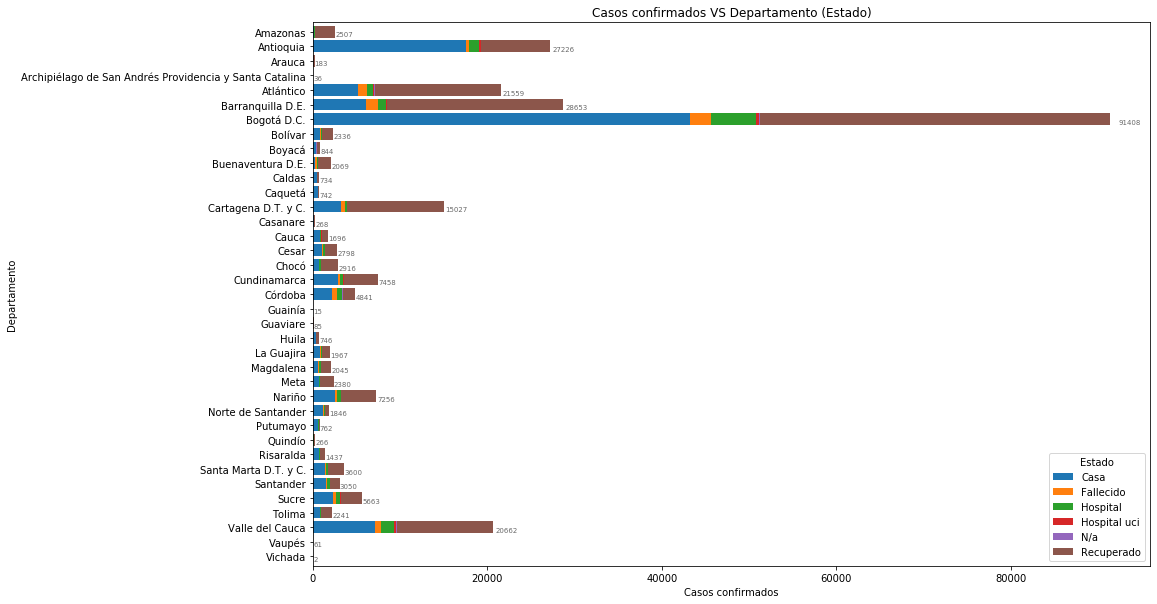

In [13]:
ax = data.groupby(['Departamento', 'Estado']).size().unstack().fillna(0).sort_index(ascending=False).plot(kind='barh', width=0.8, stacked=True, figsize=(15,10), title=('Casos confirmados VS Departamento (Estado)'))
ax.set_xlabel('Casos confirmados')
div = len(data['Estado'].unique())
numbers_H(div)

### - Casos confirmados VS Estado (Sexo)

In [14]:
data.groupby(['Estado', 'Sexo']).size().unstack().fillna(0)

Sexo              F      M
Estado                    
Casa          50500  55378
Fallecido      3320   5754
Hospital       5784   7853
Hospital uci    559   1020
N/a             225    302
Recuperado    64233  72457

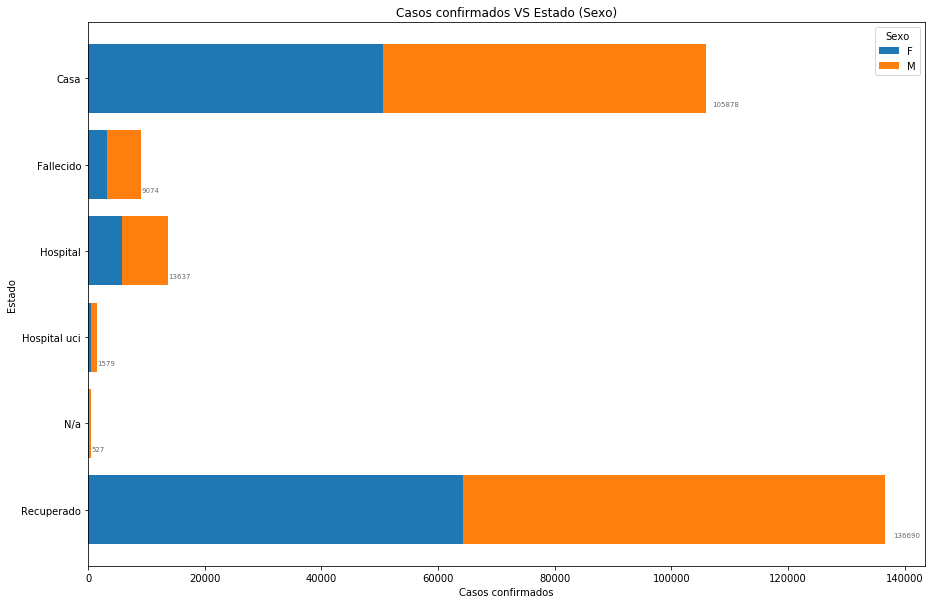

In [15]:
ax = data.groupby(['Estado', 'Sexo']).size().unstack().fillna(0).sort_index(ascending=False).plot(kind='barh', width=0.8, stacked=True, figsize=(15,10), title=('Casos confirmados VS Estado (Sexo)'))
ax.set_xlabel('Casos confirmados')
div = len(data['Sexo'].unique())
numbers_H(div)

### - Casos confirmados VS Estado (Clasificación de edad)

In [16]:
data.groupby(['Estado', 'Clasificación de edad']).size().unstack().fillna(0)

Clasificación de edad  0 - 10  10 - 20  20 - 30  30 - 40  40 - 50  50 - 60  \
Estado                                                                       
Casa                     4102     8098    26434    26300    17350    13088   
Fallecido                  14       19      130      312      729     1383   
Hospital                  520      276     1028     1604     2180     2914   
Hospital uci               66       29       55      166      223      373   
N/a                        14       10       24       22       41       66   
Recuperado               6295    11658    34116    33229    21525    16338   

Clasificación de edad  60 - 70  70 - 80  80 - 90  90 - 100+  
Estado                                                       
Casa                      6329     2790     1182        205  
Fallecido                 2122     2287     1679        399  
Hospital                  2559     1652      799        105  
Hospital uci               365      221       77          4  
N/a                        101      114      105         30  
Recuperado                8277     3611     1407        234

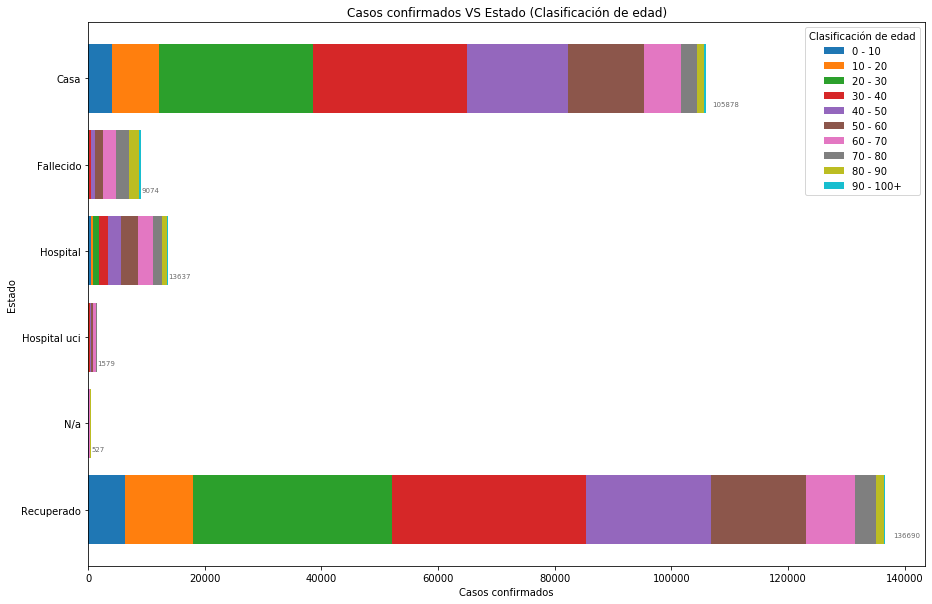

In [17]:
ax = data.groupby(['Estado', 'Clasificación de edad']).size().unstack().fillna(0).sort_index(ascending=False).plot(kind='barh', width=0.8, stacked=True, figsize=(15,10), title=('Casos confirmados VS Estado (Clasificación de edad)'))
ax.set_xlabel('Casos confirmados')
div = len(data['Clasificación de edad'].unique())
numbers_H(div)

### - Casos confirmados VS Tipo de contagio (Sexo)

In [18]:
data.groupby(['Tipo', 'Sexo']).size().unstack().fillna(0)

Sexo              F       M
Tipo                       
En estudio   118255  128567
Importado       454     518
Relacionado    5912   13679

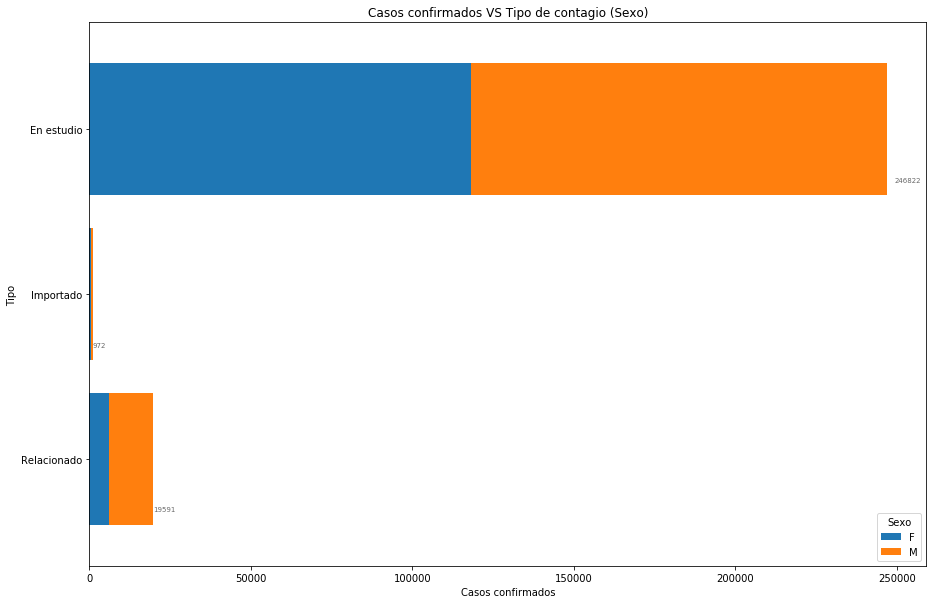

In [19]:
ax = data.groupby(['Tipo', 'Sexo']).size().unstack().fillna(0).sort_index(ascending=False).plot(kind='barh', width=0.8, stacked=True, figsize=(15,10), title=('Casos confirmados VS Tipo de contagio (Sexo)'))
ax.set_xlabel('Casos confirmados')
div = len(data['Sexo'].unique())
numbers_H(div)

### - Casos confirmados VS Tipo (Clasificación de edad)

In [20]:
data.groupby(['Tipo', 'Clasificación de edad']).size().unstack().fillna(0)

Clasificación de edad  0 - 10  10 - 20  20 - 30  30 - 40  40 - 50  50 - 60  \
Tipo                                                                         
En estudio              10156    17659    56137    56661    39278    32139   
Importado                   6       37      239      229      172      150   
Relacionado               849     2394     5411     4743     2598     1873   

Clasificación de edad  60 - 70  70 - 80  80 - 90  90 - 100+  
Tipo                                                         
En estudio               18709    10186     4982        915  
Importado                   94       35        9          1  
Relacionado                950      454      258         61

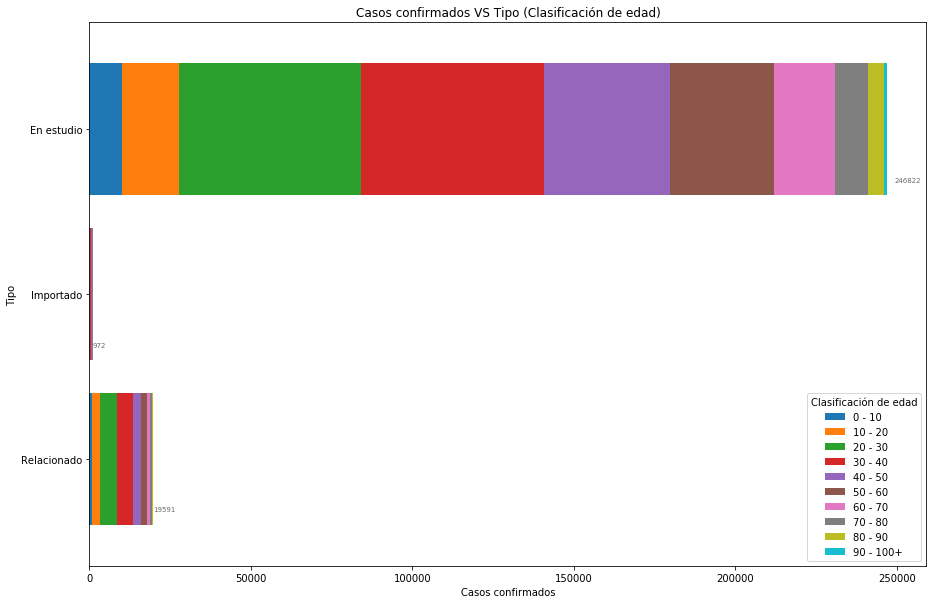

In [21]:
ax = data.groupby(['Tipo', 'Clasificación de edad']).size().unstack().fillna(0).sort_index(ascending=False).plot(kind='barh', width=0.8, stacked=True, figsize=(15,10), title=('Casos confirmados VS Tipo (Clasificación de edad)'))
ax.set_xlabel('Casos confirmados')
div = len(data['Clasificación de edad'].unique())
numbers_H(div)

### - Casos confirmados VS Clasificación de edad (Sexo)

In [22]:
data.groupby(['Clasificación de edad', 'Sexo']).size().unstack().fillna(0)

Sexo                       F      M
Clasificación de edad              
0 - 10                  5444   5567
10 - 20                 9238  10852
20 - 30                29303  32484
30 - 40                28162  33471
40 - 50                19651  22397
50 - 60                15793  18369
60 - 70                 9058  10695
70 - 80                 4838   5837
80 - 90                 2569   2680
90 - 100+                565    412

In [23]:
ax = data.groupby(['Clasificación de edad', 'Sexo']).size().unstack().fillna(0).sort_index(ascending=False).plot(kind='barh', width=0.8, stacked=True, figsize=(15,10), title=('Casos confirmados VS Clasificación de edad (Sexo)'))
ax.set_xlabel('Casos confirmados')
div = len(data['Sexo'].unique())
numbers_H(div)

### - Casos confirmados VS Clasificación de edad (Estado)

In [24]:
data.groupby(['Clasificación de edad', 'Estado']).size().unstack().fillna(0)

Estado                  Casa  Fallecido  Hospital  Hospital uci  N/a  \
Clasificación de edad                                                  
0 - 10                  4102         14       520            66   14   
10 - 20                 8098         19       276            29   10   
20 - 30                26434        130      1028            55   24   
30 - 40                26300        312      1604           166   22   
40 - 50                17350        729      2180           223   41   
50 - 60                13088       1383      2914           373   66   
60 - 70                 6329       2122      2559           365  101   
70 - 80                 2790       2287      1652           221  114   
80 - 90                 1182       1679       799            77  105   
90 - 100+                205        399       105             4   30   

Estado                 Recuperado  
Clasificación de edad              
0 - 10                       6295  
10 - 20                     11658  
20 - 30                     34116  
30 - 40                     33229  
40 - 50                     21525  
50 - 60                     16338  
60 - 70                      8277  
70 - 80                      3611  
80 - 90                      1407  
90 - 100+                     234

In [25]:
ax = data.groupby(['Clasificación de edad', 'Estado']).size().unstack().fillna(0).sort_index(ascending=False).plot(kind='barh', width=0.8, stacked=True, figsize=(15,10), title=('Casos confirmados VS Clasificación de edad (Estado)'))
ax.set_xlabel('Casos confirmados')
div = len(data['Estado'].unique())
numbers_H(div)

### - Casos confirmados VS Fecha de diagnóstico (Sexo)

In [26]:
data.groupby(['Fecha de diagnóstico', 'Sexo']).size().unstack().fillna(0)

Sexo                       F       M
Fecha de diagnóstico                
2020-03-06               1.0     0.0
2020-03-09               1.0     1.0
2020-03-11               4.0     2.0
2020-03-12               5.0     0.0
2020-03-13               2.0     3.0
...                      ...     ...
2020-07-24            3826.0  4498.0
2020-07-25            3112.0  3091.0
2020-07-26            1540.0  1628.0
2020-07-27            2890.0  3145.0
2020-07-28            2397.0  2545.0

[142 rows x 2 columns]

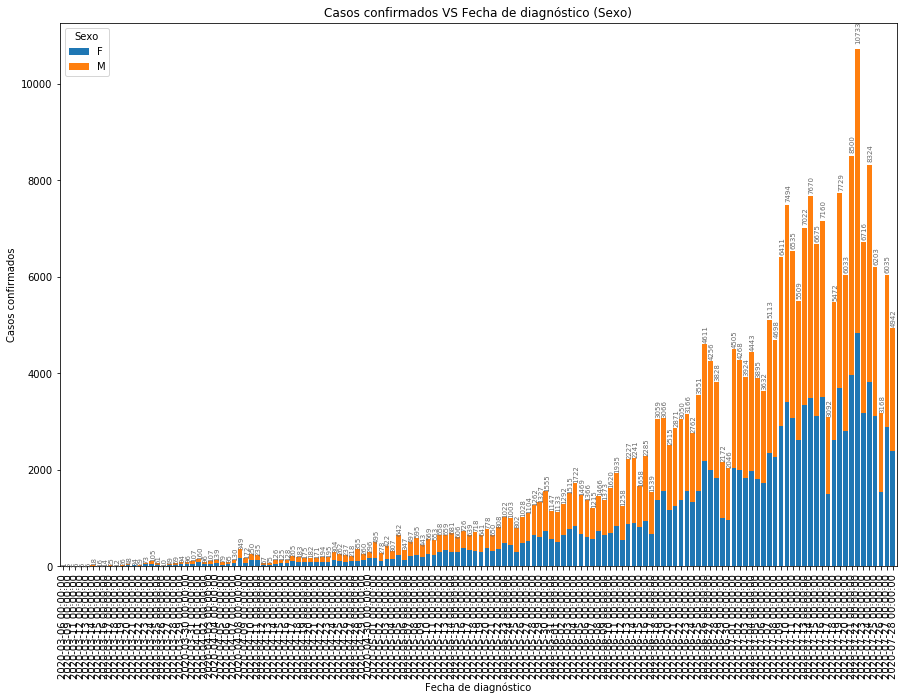

In [27]:
ax = data.groupby(['Fecha de diagnóstico', 'Sexo']).size().unstack().fillna(0).plot(kind='bar', width=0.8, stacked=True, figsize=(15,10), title=('Casos confirmados VS Fecha de diagnóstico (Sexo)'))
ax.set_ylabel('Casos confirmados')
div = len(data['Sexo'].unique())
numbers(div)

### - Casos confirmados VS Fecha de diagnóstico (Clasificación de edad)

In [28]:
data.groupby(['Fecha de diagnóstico', 'Clasificación de edad']).size().unstack().fillna(0)

Clasificación de edad  0 - 10  10 - 20  20 - 30  30 - 40  40 - 50  50 - 60  \
Fecha de diagnóstico                                                         
2020-03-06                  0        1        0        0        0        0   
2020-03-09                  0        0        0        1        1        0   
2020-03-11                  0        0        4        0        0        1   
2020-03-12                  0        0        0        1        1        1   
2020-03-13                  0        0        1        0        2        0   
...                       ...      ...      ...      ...      ...      ...   
2020-07-24                280      625     1899     2047     1325     1073   
2020-07-25                227      399     1396     1464     1010      833   
2020-07-26                107      184      734      746      512      402   
2020-07-27                185      432     1415     1424      979      717   
2020-07-28                208      347     1139     1069      824      703   

Clasificación de edad  60 - 70  70 - 80  80 - 90  90 - 100+  
Fecha de diagnóstico                                         
2020-03-06                   0        0        0          0  
2020-03-09                   0        0        0          0  
2020-03-11                   0        0        1          0  
2020-03-12                   1        1        0          0  
2020-03-13                   2        0        0          0  
...                        ...      ...      ...        ...  
2020-07-24                 593      330      129         23  
2020-07-25                 461      260      128         25  
2020-07-26                 225      162       85         11  
2020-07-27                 454      243      150         36  
2020-07-28                 359      189       81         23  

[142 rows x 10 columns]

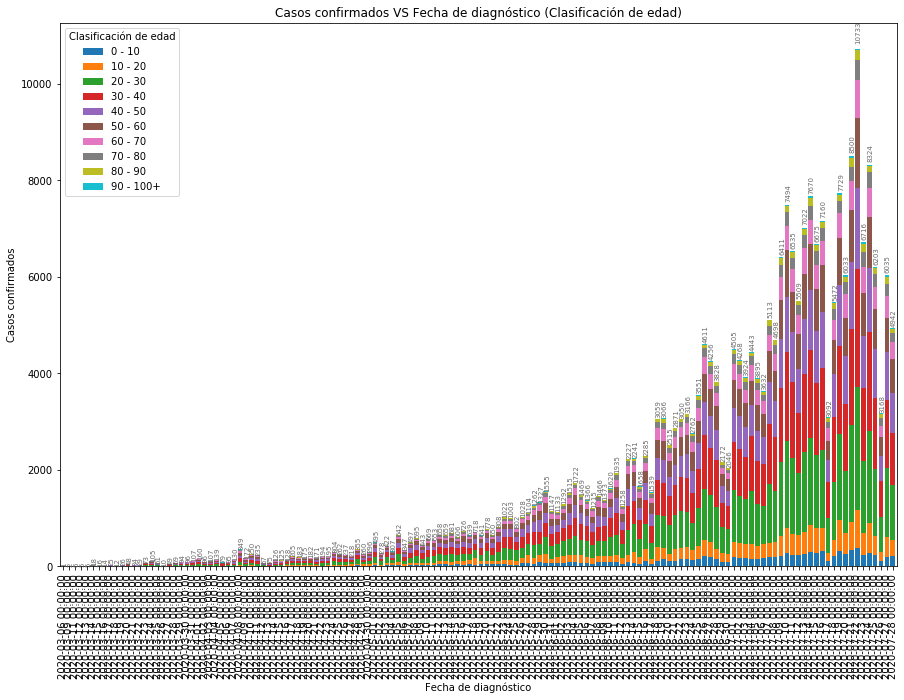

In [29]:
ax = data.groupby(['Fecha de diagnóstico', 'Clasificación de edad']).size().unstack().fillna(0).plot(kind='bar', width=0.8, stacked=True, figsize=(15,10), title=('Casos confirmados VS Fecha de diagnóstico (Clasificación de edad)'))
ax.set_ylabel('Casos confirmados')
div = len(data['Clasificación de edad'].unique())
numbers(div)

### - Casos confirmados VS Fecha de diagnóstico (Estado)

In [30]:
data.groupby(['Fecha de diagnóstico', 'Estado']).size().unstack().fillna(0)

Estado                  Casa  Fallecido  Hospital  Hospital uci  N/a  \
Fecha de diagnóstico                                                   
2020-03-06               0.0        0.0       0.0           0.0  0.0   
2020-03-09               0.0        0.0       0.0           0.0  0.0   
2020-03-11               0.0        0.0       0.0           0.0  0.0   
2020-03-12               0.0        0.0       0.0           0.0  0.0   
2020-03-13               0.0        0.0       0.0           0.0  0.0   
...                      ...        ...       ...           ...  ...   
2020-07-24            7641.0      130.0     435.0          37.0  5.0   
2020-07-25            5585.0      106.0     440.0          37.0  6.0   
2020-07-26            2795.0       89.0     255.0          27.0  1.0   
2020-07-27            5311.0       36.0     390.0          44.0  1.0   
2020-07-28            4577.0        0.0     361.0           4.0  0.0   

Estado                Recuperado  
Fecha de diagnóstico              
2020-03-06                   1.0  
2020-03-09                   2.0  
2020-03-11                   6.0  
2020-03-12                   5.0  
2020-03-13                   5.0  
...                          ...  
2020-07-24                  76.0  
2020-07-25                  29.0  
2020-07-26                   1.0  
2020-07-27                 253.0  
2020-07-28                   0.0  

[142 rows x 6 columns]

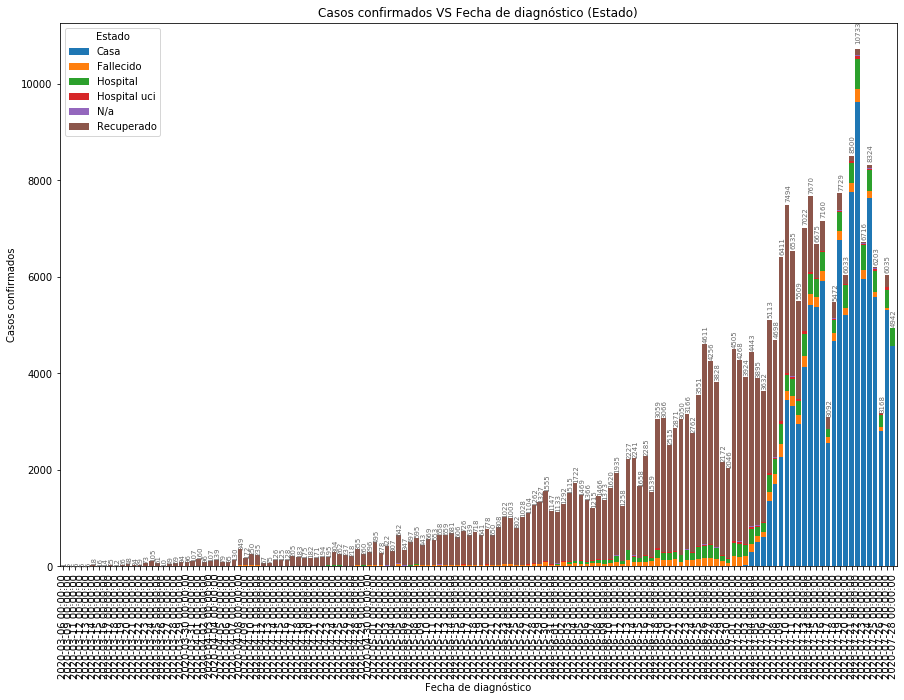

In [31]:
ax = data.groupby(['Fecha de diagnóstico', 'Estado']).size().unstack().fillna(0).plot(kind='bar', width=0.8, stacked=True, figsize=(15,10), title=('Casos confirmados VS Fecha de diagnóstico (Estado)'))
ax.set_ylabel('Casos confirmados')
div = len(data['Estado'].unique())
numbers(div)

### - Casos confirmados acumulado VS Fecha de diagnóstico (Sexo)

In [32]:
data.groupby(['Fecha de diagnóstico', 'Sexo']).size().unstack().fillna(0).cumsum()

Sexo                         F         M
Fecha de diagnóstico                    
2020-03-06                 1.0       0.0
2020-03-09                 2.0       1.0
2020-03-11                 6.0       3.0
2020-03-12                11.0       3.0
2020-03-13                13.0       6.0
...                        ...       ...
2020-07-24            112903.0  130354.0
2020-07-25            116015.0  133445.0
2020-07-26            117555.0  135073.0
2020-07-27            120445.0  138218.0
2020-07-28            122842.0  140763.0

[142 rows x 2 columns]

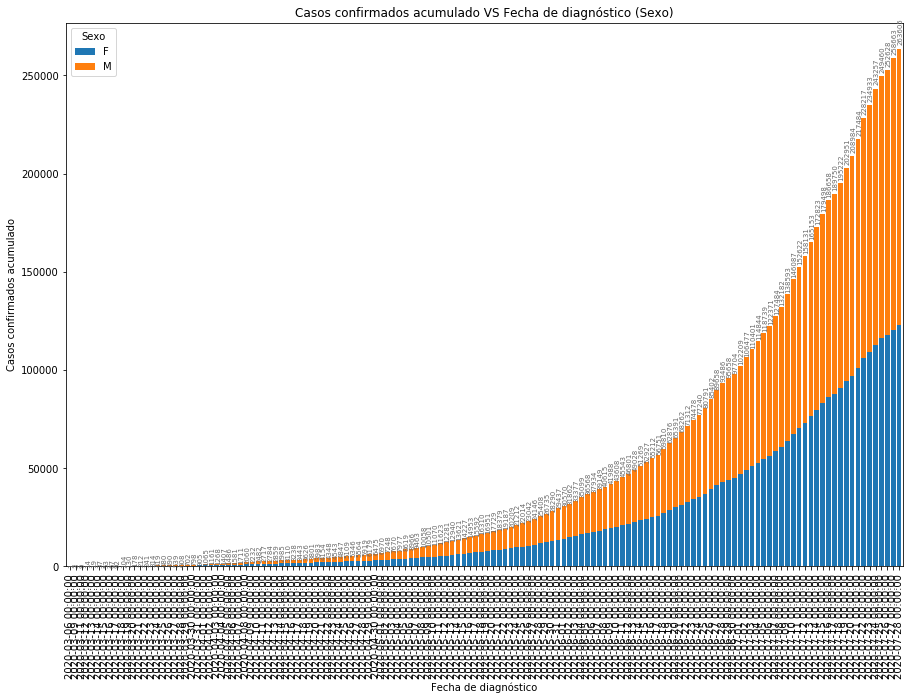

In [33]:
ax = data.groupby(['Fecha de diagnóstico', 'Sexo']).size().unstack().fillna(0).cumsum().plot(kind='bar', width=0.8, stacked=True, figsize=(15,10), title=('Casos confirmados acumulado VS Fecha de diagnóstico (Sexo)'))
ax.set_ylabel('Casos confirmados acumulado')
div = len(data['Sexo'].unique())
numbers(div)

### - Casos confirmados acumulado VS Fecha de diagnóstico (Clasificación de edad)

In [34]:
data.groupby(['Fecha de diagnóstico', 'Clasificación de edad']).size().unstack().fillna(0).cumsum()

Clasificación de edad  0 - 10  10 - 20  20 - 30  30 - 40  40 - 50  50 - 60  \
Fecha de diagnóstico                                                         
2020-03-06                  0        1        0        0        0        0   
2020-03-09                  0        1        0        1        1        0   
2020-03-11                  0        1        4        1        1        1   
2020-03-12                  0        1        4        2        2        2   
2020-03-13                  0        1        5        2        4        2   
...                       ...      ...      ...      ...      ...      ...   
2020-07-24              10151    18452    56200    56022    38168    31045   
2020-07-25              10378    18851    57596    57486    39178    31878   
2020-07-26              10485    19035    58330    58232    39690    32280   
2020-07-27              10670    19467    59745    59656    40669    32997   
2020-07-28              10878    19814    60884    60725    41493    33700   

Clasificación de edad  60 - 70  70 - 80  80 - 90  90 - 100+  
Fecha de diagnóstico                                         
2020-03-06                   0        0        0          0  
2020-03-09                   0        0        0          0  
2020-03-11                   0        0        1          0  
2020-03-12                   1        1        1          0  
2020-03-13                   3        1        1          0  
...                        ...      ...      ...        ...  
2020-07-24               17963     9663     4721        872  
2020-07-25               18424     9923     4849        897  
2020-07-26               18649    10085     4934        908  
2020-07-27               19103    10328     5084        944  
2020-07-28               19462    10517     5165        967  

[142 rows x 10 columns]

In [35]:
ax = data.groupby(['Fecha de diagnóstico', 'Clasificación de edad']).size().unstack().fillna(0).cumsum().plot(kind='bar', width=0.8, stacked=True, figsize=(15,10), title=('Casos confirmados acumulados VS Fecha de diagnóstico (Clasificación de edad)'))
ax.set_ylabel('Casos confirmados acumulado')
div = len(data['Clasificación de edad'].unique())
numbers(div)

### - Casos confirmados acumulado VS Fecha de diagnóstico (Estado)

In [36]:
data.groupby(['Fecha de diagnóstico', 'Estado']).size().unstack().fillna(0).cumsum()

Estado                    Casa  Fallecido  Hospital  Hospital uci    N/a  \
Fecha de diagnóstico                                                       
2020-03-06                 0.0        0.0       0.0           0.0    0.0   
2020-03-09                 0.0        0.0       0.0           0.0    0.0   
2020-03-11                 0.0        0.0       0.0           0.0    0.0   
2020-03-12                 0.0        0.0       0.0           0.0    0.0   
2020-03-13                 0.0        0.0       0.0           0.0    0.0   
...                        ...        ...       ...           ...    ...   
2020-07-24             87565.0     8666.0   12044.0        1434.0  500.0   
2020-07-25             93150.0     8772.0   12484.0        1471.0  506.0   
2020-07-26             95945.0     8861.0   12739.0        1498.0  507.0   
2020-07-27            101256.0     8897.0   13129.0        1542.0  508.0   
2020-07-28            105833.0     8897.0   13490.0        1546.0  508.0   

Estado                Recuperado  
Fecha de diagnóstico              
2020-03-06                   1.0  
2020-03-09                   3.0  
2020-03-11                   9.0  
2020-03-12                  14.0  
2020-03-13                  19.0  
...                          ...  
2020-07-24              133048.0  
2020-07-25              133077.0  
2020-07-26              133078.0  
2020-07-27              133331.0  
2020-07-28              133331.0  

[142 rows x 6 columns]

In [37]:
ax = data.groupby(['Fecha de diagnóstico', 'Estado']).size().unstack().fillna(0).cumsum().plot(kind='bar', width=0.8, stacked=True, figsize=(15,10), title=('Casos confirmados acumulado VS Fecha de diagnóstico (Estado)'))
ax.set_ylabel('Casos confirmados acumulado')
div = len(data['Estado'].unique())
numbers(div)

## #StayHome #QuédateEnCasa

### Made with ♥ by <a href='https://github.com/jlcadavid'>@jlcadavid</a>